In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, r2_score
from sklearn import metrics


# Задание 1
Использовать любой датафрейм для решения задачи машинного обучения: классификации или регрессии. Выберите целевой признак самостоятельно. Обучите модель, сделайте предсказание, оцените качество модели.

Наш датайфрейм будет содержать данные о признаках красного вина, гипотезы выдвинем дальше, а пока давайте прочитаем набор данных, проверим наличие пустых ячеек, дубликатов и подготовим данные по необходимости

In [ ]:
df = pd.read_csv("/content/winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1596 entries, 0 to 1595
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1596 non-null   float64
 1   volatile acidity      1596 non-null   float64
 2   citric acid           1596 non-null   float64
 3   residual sugar        1596 non-null   float64
 4   chlorides             1596 non-null   float64
 5   free sulfur dioxide   1596 non-null   float64
 6   total sulfur dioxide  1596 non-null   float64
 7   density               1596 non-null   float64
 8   pH                    1596 non-null   float64
 9   sulphates             1596 non-null   float64
 10  alcohol               1596 non-null   float64
 11  quality               1596 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 149.8 KB


In [ ]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Все данные числовые, отлично, нулевых значений нет, фрейм данных полный, позже мы визуализируем значения и сопоставим их на равенство

Проверим на дубликаты

In [ ]:
df.duplicated().sum()

239

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000
mean,8.304348,0.529609,0.271518,2.519086,0.087733,15.876934,46.791820,0.996706,3.310450,0.657583,10.429784,5.624908
std,1.725829,0.183108,0.194408,1.346328,0.047335,10.444489,33.421687,0.001868,0.154116,0.166787,1.075677,0.822830
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.860000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.090000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.600000,1.580000,0.790000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,1.980000,14.000000,8.000000


Посмотрим на данные о лучших винах и сравним их со средними значениями по всему набору данных

In [ ]:
df_maxq = df[df['quality'] == df['quality'].max()]
df_maxq.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.0
mean,8.441176,0.427647,0.382941,2.576471,0.068353,13.764706,34.470588,0.995095,3.274118,0.774706,12.158824,8.0
std,2.114846,0.148178,0.202539,1.334883,0.012031,11.300052,25.829048,0.002398,0.204605,0.115006,1.229867,0.0
min,5.000000,0.260000,0.030000,1.400000,0.044000,3.000000,12.000000,0.990800,2.880000,0.630000,9.800000,8.0
25%,7.200000,0.330000,0.300000,1.800000,0.061000,6.000000,16.000000,0.994170,3.200000,0.690000,11.400000,8.0
50%,7.900000,0.380000,0.390000,2.000000,0.071000,8.000000,24.000000,0.994720,3.230000,0.740000,12.500000,8.0
75%,10.000000,0.490000,0.530000,2.600000,0.076000,17.000000,45.000000,0.997200,3.350000,0.820000,12.900000,8.0
max,12.600000,0.850000,0.720000,6.400000,0.086000,42.000000,88.000000,0.998800,3.720000,1.100000,14.000000,8.0


Обратим внимание, что некоторые средние значения сильно изменились, например, оба параметра содержания диоксида серы в среднем стали ниже с повышением качества вина. Прочитав дополнительные источники, я выяснила, что диоксид серы безвреден, но считается, что после употребления вина с более низким показателем состояние не ухудшается утром, а в последнее время наметилась тенденция к винам без диоксида серы, это связано с очевидным снижением максимального и среднего значения по этому параметру
Также нельзя не отметить увеличение среднего и квантильного распределения параметра о процентном содержании алкоголя, из этого можно сделать вывод, что людям больше нравятся чуть более крепкие вина

Давайте посмотрим на худшие вина, чтобы подтвердить гипотезы

In [ ]:
df_minq = df.loc[df['quality'].isin([3, 4])]
df_minq.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,7.850000,0.727500,0.160323,2.673387,0.087435,11.741935,33.887097,0.996642,3.394516,0.569516,10.229032,3.838710
std,1.653883,0.248601,0.179854,1.735354,0.036471,8.781380,26.234194,0.001638,0.155729,0.134657,0.919664,0.370801
min,4.600000,0.230000,0.000000,1.200000,0.045000,3.000000,7.000000,0.993400,3.050000,0.330000,8.400000,3.000000
25%,6.800000,0.580000,0.020000,1.900000,0.068250,5.000000,13.250000,0.995653,3.302500,0.492500,9.600000,4.000000
50%,7.500000,0.680000,0.075000,2.100000,0.080000,9.000000,25.000000,0.996560,3.380000,0.560000,10.000000,4.000000
75%,8.375000,0.883750,0.267500,2.750000,0.092000,15.000000,47.750000,0.997600,3.500000,0.600000,11.000000,4.000000
max,12.500000,1.580000,0.660000,12.900000,0.267000,41.000000,119.000000,1.001000,3.900000,1.120000,13.100000,4.000000


Гипотеза о диоксиде серы не оправдалась, но идея с процентным содержанием алкоголя стала ясна, а также было обнаружено явное влияние летучих кислот и лимонной кислоты, которые скорее влияют на вкус

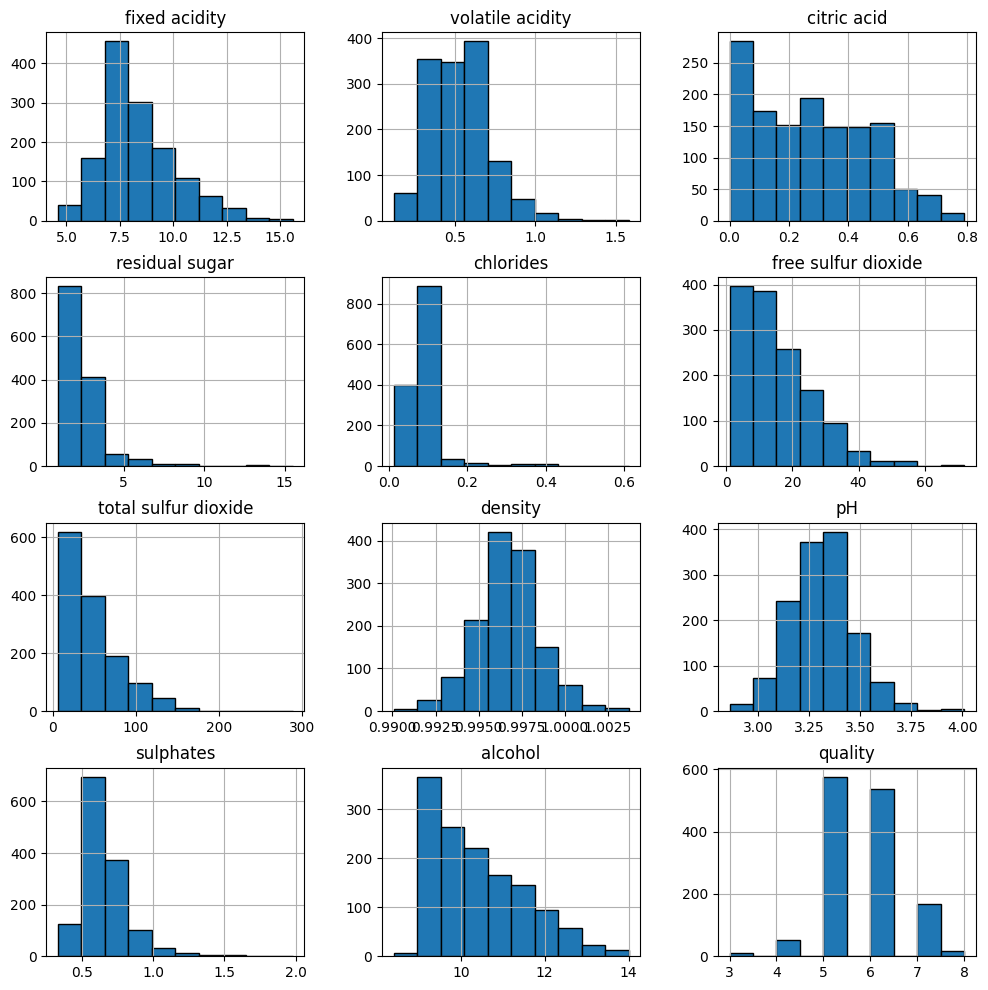

In [ ]:
df.hist(edgecolor='black', figsize=(12, 12))
plt.show()

Давайте построим корреляционную таблицу для лучшего понимания ситуации


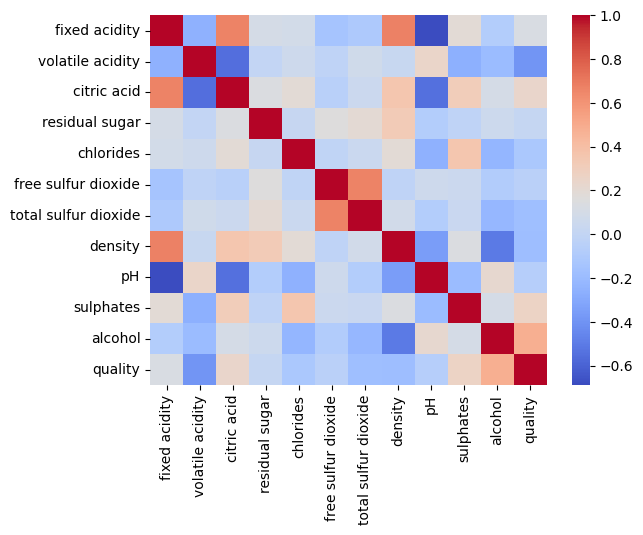

In [ ]:
corr = df.corr()
ax = sns.heatmap(
    corr,
    cmap = 'coolwarm'
)

Высокая корреляция для сульфатов и спирта, плохая для летучей кислотности, давайте построим графики


In [ ]:
fig1 = px.scatter(df, x="quality", y="alcohol")
fig1.show()

fig2 = px.scatter(df, x="quality", y="sulphates")
fig2.show()

fig3 = px.scatter(df, x="quality", y="volatile acidity")
fig3.show()

Из этого мы видим, что алкоголь имеет высокую корреляцию с качеством, сульфаты и лимонная кислота имеют несколько более низкую корреляцию
Но предположение о летучей кислотности также оказалось сложным, и мы еще раз убедились, что диоксид серы не влияет

Разделим вина по качеству

In [ ]:
df["quality"].value_counts()

5    576
6    535
7    167
4     52
8     17
3     10
Name: quality, dtype: int64

In [ ]:
def quality(a):
    if a <= 6:
        return "bad wine"
    elif a > 6 and a < 8:
        return "good wine"
    else:
        return "excellent wine"

df["quality"]=df["quality"].apply(quality)

In [ ]:
df["quality"].value_counts()

bad wine          1173
good wine          167
excellent wine      17
Name: quality, dtype: int64

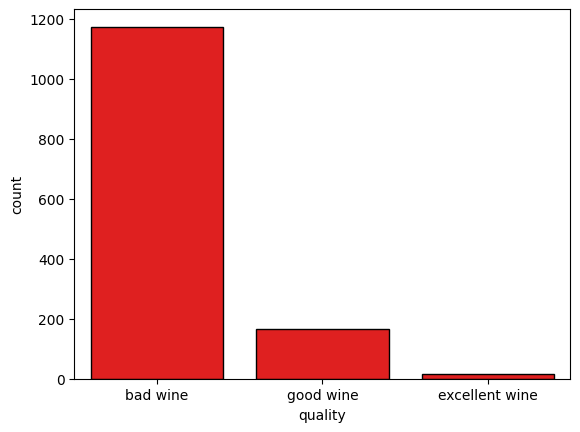

In [ ]:
sns.countplot(x ='quality', data = df, color = 'red', edgecolor = 'black');

Проверим влияние каждого параметра в новой классификации, это должно дополнить наши гипотезы, вытекающие из анализа исследования

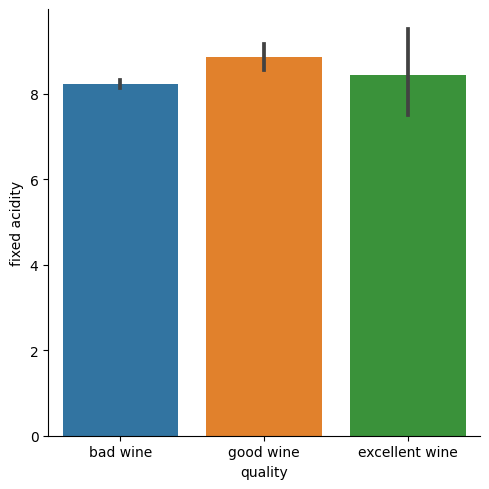

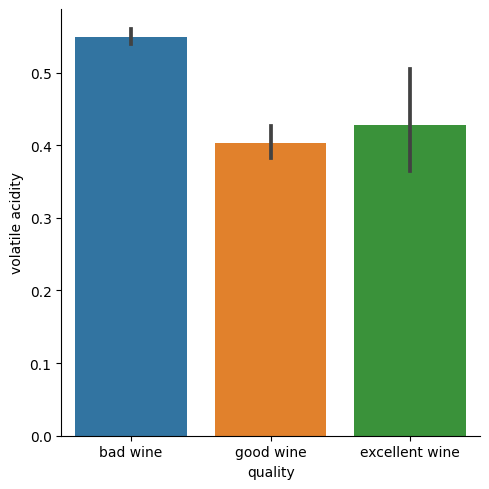

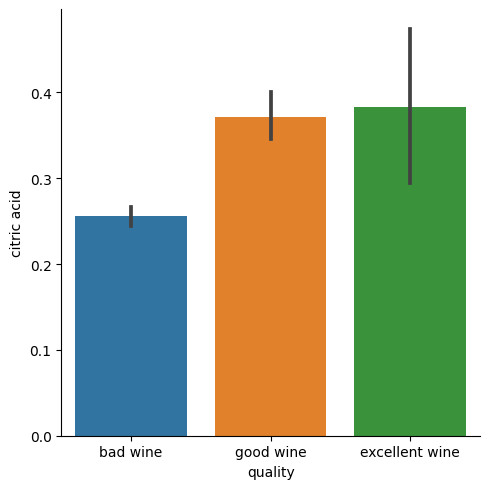

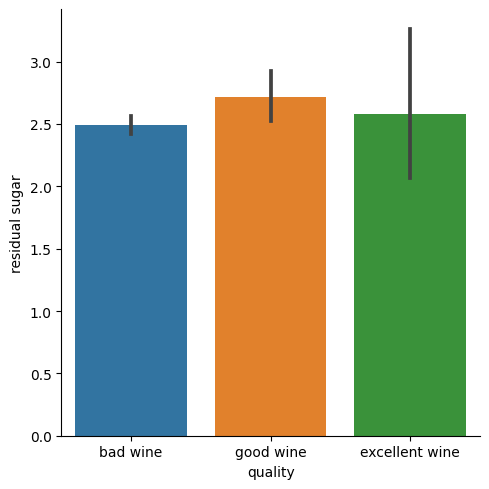

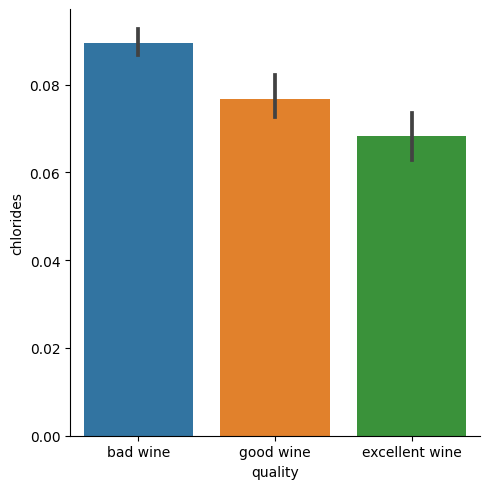

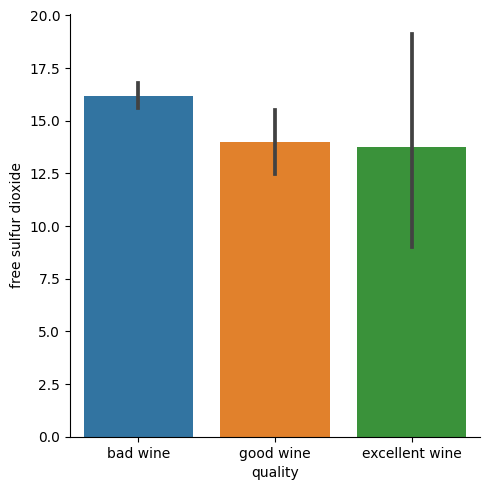

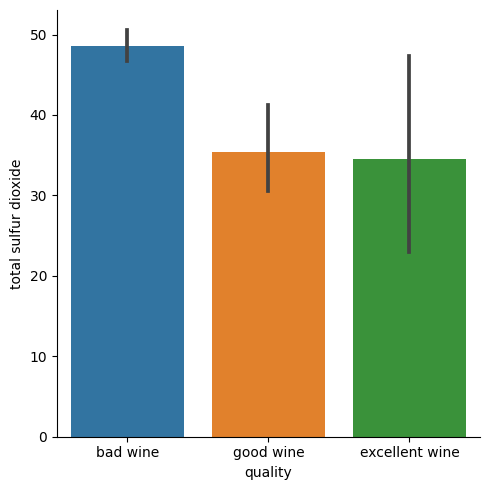

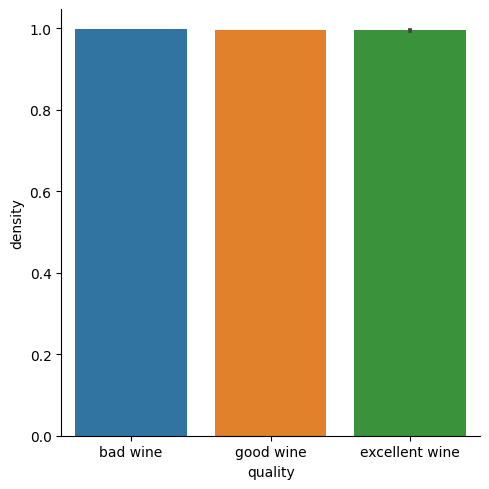

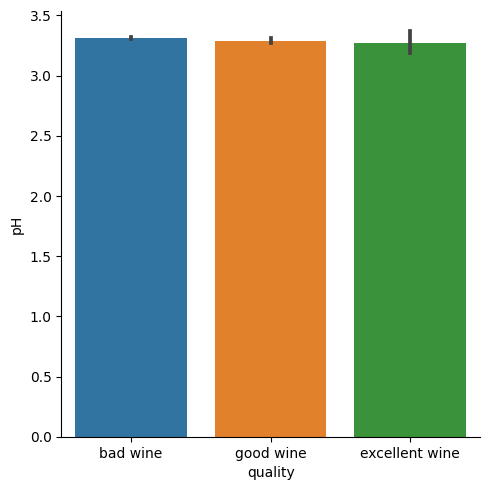

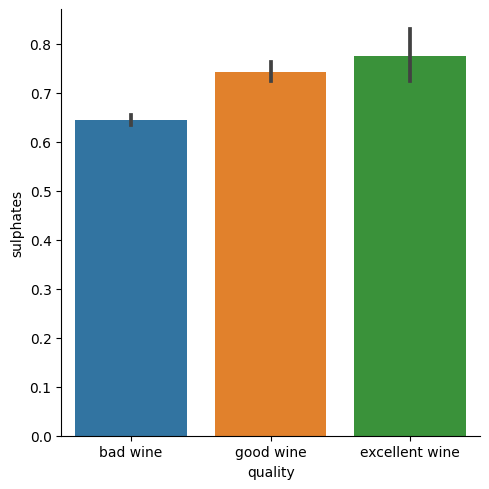

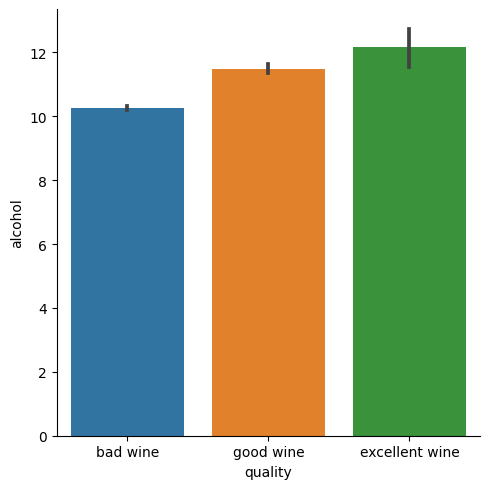

In [ ]:
for column in df.columns[:-1]:
    sns.catplot(x='quality', y=column, data=df, kind='bar', height=5, aspect=1);

Полное дополнение корреляционной таблицы, все выводы были подтверждены

In [ ]:
le = LabelEncoder()
df.quality = le.fit_transform(df.quality)

X = df.drop("quality",axis=1)
y = df["quality"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)


y_pred = lr.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
acc = metrics.accuracy_score(y_test, y_pred)

print(cm)
print(acc)

[[222   0   2]
 [  2   0   1]
 [ 33   0  12]]
0.8602941176470589


In [ ]:
lr.coef_

array([[-0.05658978,  0.25791506, -0.08582329, -0.15712999,  0.48395941,
        -0.14424836,  0.57297962,  0.24041981,  0.19734852, -0.56808891,
        -0.77918511],
       [-0.4913983 ,  0.18824795,  0.33291808, -0.01151909, -0.57987624,
         0.18861131, -0.64629489, -0.04494464, -0.45931351,  0.48839608,
         0.7865632 ],
       [ 0.54798808, -0.446163  , -0.24709479,  0.16864908,  0.09591683,
        -0.04436295,  0.07331528, -0.19547517,  0.26196499,  0.07969284,
        -0.00737809]])

86% - не такая уж плохая модель, мы можем попробовать другие методы классификации - машины опорных векторов, случайный лес и линейную регрессию, это может дать нам более хороший результат

In [ ]:
svc=SVC()
svc.fit(X_train,y_train)

y_pred = svc.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
acc = metrics.accuracy_score(y_test, y_pred)
print(cm)
print(acc)

[[224   0   0]
 [  2   0   1]
 [ 37   0   8]]
0.8529411764705882


In [ ]:
ran = RandomForestClassifier()
ran.fit(X_train, y_train)


y_pred = ran.predict(X_test)

cm=confusion_matrix(y_test,y_pred)
acc = metrics.accuracy_score(y_test, y_pred)
print(cm)
print(acc)
print(ran.feature_importances_)

[[221   0   3]
 [  2   0   1]
 [ 29   1  15]]
0.8676470588235294
[0.08003234 0.12201709 0.08361297 0.06625029 0.07461868 0.05899283
 0.08295339 0.0956383  0.06413678 0.13189044 0.1398569 ]


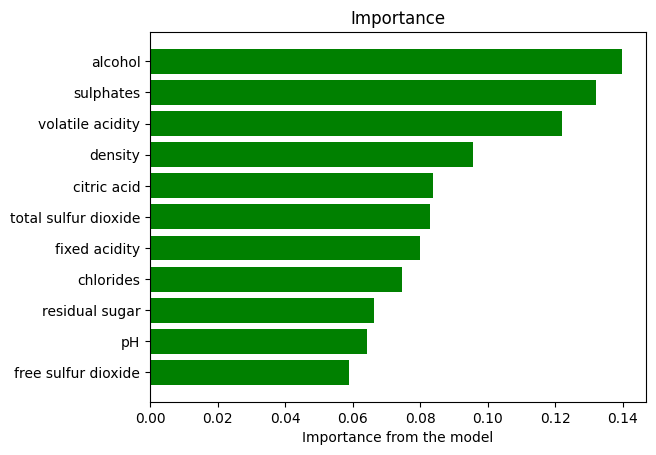

In [ ]:
importances = ran.feature_importances_
indices = np.argsort(importances)

features = df.columns[0:-1]
plt.title('Importance')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Importance from the model')
plt.show()

In [ ]:
df1 = pd.read_csv('/content/winequality-red.csv')
X = df1.drop(['quality'], axis= 1)
y = df1["quality"]
X


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1591,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1592,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1593,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1594,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)
lm = LinearRegression()
X_train_sm = sc.fit_transform(X_train)
mlr = lm.fit(X_train_sm, y_train)
X_test_sm = sc.transform(X_test)
y_pred_sm = mlr.predict(X_test_sm)

In [ ]:
print(f'R2 score is {r2_score(y_test, y_pred_sm)}')
print("Residual sum of squares (MSE): %.2f" % np.mean((y_pred_sm - y_test) ** 2))
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_pred_sm - y_test)))
print(f'Co-efficients are {mlr.coef_}')
print(f'Intercept is {mlr.intercept_}')

R2 score is 0.33824125103683933
Residual sum of squares (MSE): 0.44
Mean absolute error: 0.53
Co-efficients are [ 0.06284864 -0.17829027 -0.04080226  0.03588569 -0.06570536  0.02792692
 -0.08941356 -0.06438496 -0.07233768  0.14578871  0.31377127]
Intercept is 5.645768025078373


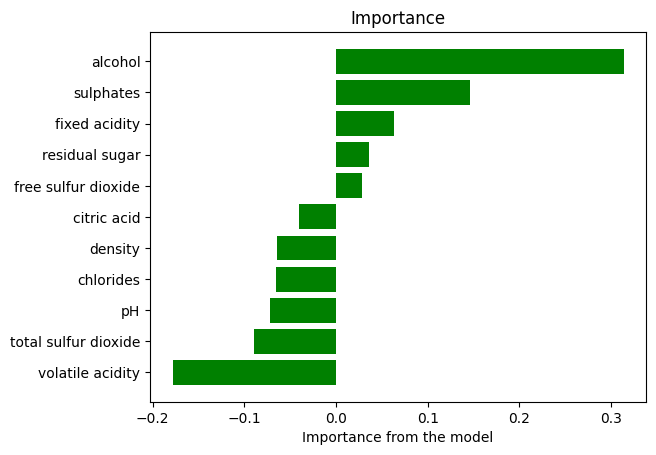

In [ ]:
importances = mlr.coef_
indices = np.argsort(importances)

features = df.columns[0:-1]
plt.title('Importance')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Importance from the model')
plt.show()

Мы можем описать дополнение модели к корреляционной таблице, модель со случайным деревом и сделать полный вывод. Высокий рейтинг качества вина связан со следующими характеристиками:

1) Высокий процент содержания алкоголя

2) Высокое содержание сульфатов

3) Низкая летучая кислотность

In [ ]:
frames = [y_pred_sm, y_test.values]
result_pred = pd.DataFrame(data=frames)
result_pred=result_pred.T
result_pred_Lin=result_pred.rename(columns={0:'Pred_Linear',1:'Real_Value'})
result_pred_Lin["Pred_Linear"]=result_pred_Lin["Pred_Linear"].map(lambda x:round(x,2))
result_pred_Lin["Diff"]=result_pred_Lin["Pred_Linear"]-result_pred_Lin["Real_Value"]
result_pred_Lin["Diff"]=result_pred_Lin["Diff"]
print("Mean Diff: ",abs(result_pred_Lin["Diff"]).mean())
result_pred_Lin.sample(10)

Mean Diff:  0.52503125


,Pred_Linear,Real_Value,Diff
62,6.39,7.0,-0.61
140,5.17,5.0,0.17
208,5.62,5.0,0.62
224,5.97,5.0,0.97
294,5.03,5.0,0.03
75,5.12,5.0,0.12
64,5.25,5.0,0.25
246,5.16,6.0,-0.84
279,5.05,6.0,-0.95
253,5.03,6.0,-0.97


In [ ]:
X = df1[['alcohol', 'sulphates', 'volatile acidity']]
y = df1["quality"]
X

,alcohol,sulphates,volatile acidity
0,9.4,0.56,0.700
1,9.8,0.68,0.880
2,9.8,0.65,0.760
3,9.8,0.58,0.280
4,9.4,0.56,0.700
...,...,...,...
1591,10.5,0.58,0.600
1592,11.2,0.76,0.550
1593,11.0,0.75,0.510
1594,10.2,0.71,0.645


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)
lm = LinearRegression()
X_train_sm = sc.fit_transform(X_train)
mlr = lm.fit(X_train_sm, y_train)
X_test_sm = sc.transform(X_test)
y_pred_sm = mlr.predict(X_test_sm)

In [ ]:
print(f'R2 score is {r2_score(y_test, y_pred_sm)}')
print("Residual sum of squares (MSE): %.2f" % np.mean((y_pred_sm - y_test) ** 2))
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_pred_sm - y_test)))
print(f'Co-efficients are {mlr.coef_}')
print(f'Intercept is {mlr.intercept_}')

R2 score is 0.3156759425445257
Residual sum of squares (MSE): 0.45
Mean absolute error: 0.54
Co-efficients are [ 0.34998595  0.1118842  -0.20411701]
Intercept is 5.64576802507837


In [ ]:
frames = [y_pred_sm, y_test.values]
result_pred = pd.DataFrame(data=frames)
result_pred=result_pred.T
result_pred_Lin=result_pred.rename(columns={0:'Pred_Linear',1:'Real_Value'})
result_pred_Lin["Pred_Linear"]=result_pred_Lin["Pred_Linear"].map(lambda x:round(x,2))
result_pred_Lin["Diff"]=result_pred_Lin["Pred_Linear"]-result_pred_Lin["Real_Value"]
result_pred_Lin["Diff"]=result_pred_Lin["Diff"]
print("Mean Diff: ",abs(result_pred_Lin["Diff"]).mean())
result_pred_Lin.sample(10)

Mean Diff:  0.53775


,Pred_Linear,Real_Value,Diff
214,5.39,6.0,-0.61
176,5.67,7.0,-1.33
129,5.45,6.0,-0.55
28,5.08,5.0,0.08
140,5.16,5.0,0.16
197,5.02,5.0,0.02
91,6.44,7.0,-0.56
35,5.16,5.0,0.16
161,6.05,7.0,-0.95
141,7.13,6.0,1.13


Результат не самый положительный, коэффициент невелик и средняя погрешность составляет почти 0,5, в случае оценок от 1 до 10 она довольно велика

# Задание 2
Загрузить любой датафрейм в Dask. Выполнить 5-7 любых действий с датафреймом (группировка, построение графиков, и т.д.)

In [ ]:
import dask.dataframe as dd

In [ ]:
ddf = dd.read_csv('/content/Original_data_with_more_rows.csv')
ddf.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,MathScore,ReadingScore,WritingScore
0,0,female,group B,bachelor's degree,standard,none,72,72,74
1,1,female,group C,some college,standard,completed,69,90,88
2,2,female,group B,master's degree,standard,none,90,95,93
3,3,male,group A,associate's degree,free/reduced,none,47,57,44
4,4,male,group C,some college,standard,none,76,78,75


In [ ]:
ddf = ddf.drop('Unnamed: 0', axis=1)
ddf.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,MathScore,ReadingScore,WritingScore
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
ddf1 = ddf.groupby(['Gender'])[['MathScore', 'ReadingScore', 'WritingScore']].agg(np.mean)
ddf1.head()

,MathScore,ReadingScore,WritingScore
Gender,,,
female,64.262902,73.093815,72.897692
male,69.269633,66.108957,63.978708


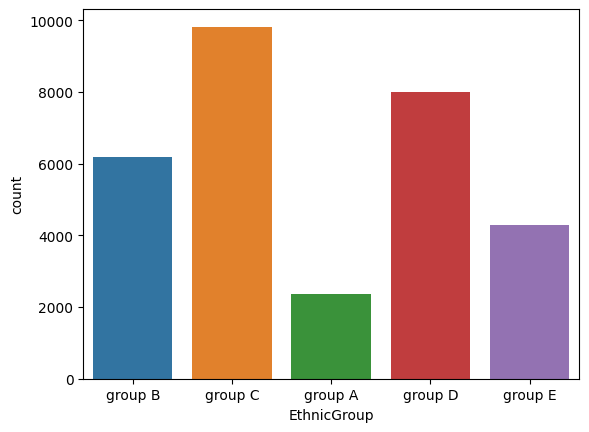

In [ ]:
sns.countplot(x=ddf['EthnicGroup'].compute())
plt.show()

In [ ]:
ddf2 = ddf.groupby(['ParentEduc'])[['MathScore', 'ReadingScore', 'WritingScore']].agg(np.mean)
ddf2.head()

,MathScore,ReadingScore,WritingScore
ParentEduc,,,
bachelor's degree,70.635000,73.375556,73.423611
some college,66.603434,69.528093,68.653661
master's degree,72.168137,75.202044,75.246168
associate's degree,68.527787,71.368350,70.374619
high school,64.670038,67.522467,65.565909


In [ ]:
x, y = 'EthnicGroup', 'LunchType'
ddf.groupby(x)[y].value_counts().compute()

EthnicGroup  LunchType   
group A      free/reduced     803
             standard        1556
group B      free/reduced    2205
             standard        3987
group C      free/reduced    3433
             standard        6383
group D      free/reduced    2779
             standard        5207
group E      free/reduced    1516
             standard        2772
Name: LunchType, dtype: int64

In [ ]:
ddf4 = dd.read_csv('/content/Expanded_data_with_more_features.csv')
ddf4.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


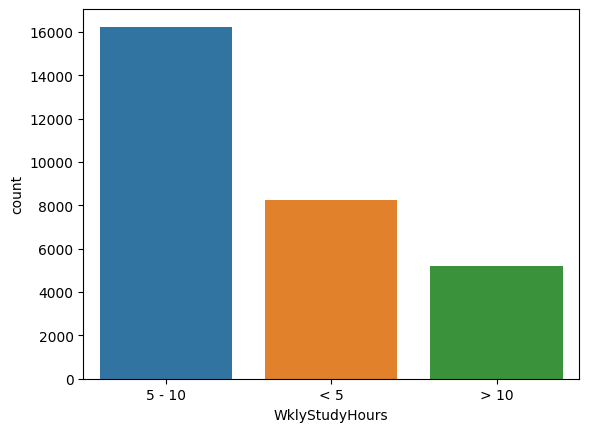

In [ ]:
sns.countplot(x=ddf4['WklyStudyHours'].compute(), order=['5 - 10', '< 5', '> 10'])
None